<a href="https://colab.research.google.com/github/massilva/dominando-data-science/blob/main/aula10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula10 - Combinação de modelos

In [7]:
import pandas as pd

url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
data = pd.read_csv(url)

data['sex'] = data['sex'].map({'female': 0, 'male': 1})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data['charges'] = data['charges'] / 1000
data['region'] = data['region'].map({region: i for i, region in enumerate(data['region'].unique())})

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16.884924
1,18,1,33.770,1,0,1,1.725552
2,28,1,33.000,3,0,1,4.449462
3,33,1,22.705,0,0,2,21.984471
4,32,1,28.880,0,0,2,3.866855


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
predictions = ['smoker',]
models = [
  LogisticRegression(),
  *[KNeighborsClassifier(n_neighbors=i) for i in range(5, 50, 10)],
  *[DecisionTreeClassifier(max_depth=i) for i in range(1, 6)],
]
names = [
  'Regressão Logística',
  *['KNN - K = {}'.format(i) for i in range(5, 50, 10)],
  *['Arvore - prof. - {}'.format(i) for i in range(1, 6)],
]
cross_models = list(zip(names, models))

In [9]:
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_validate, RepeatedKFold, train_test_split
from sklearn.ensemble import VotingClassifier
from mlxtend.plotting import plot_decision_regions

In [10]:
X = data[['bmi', 'charges']]
y = data['smoker']

In [6]:
def plot(model, name, Xtrain, ytrain, Xtest, ytest):
  model.fit(Xtrain, ytrain)
  plt.figure(figsize = (15, 6))

  plt.subplot(1, 2, 1)
  plot_decision_regions(Xtrain.values, ytrain.values, clf = model, legend = 1)
  plt.xlabel('IMC')
  plt.ylabel('Custos')
  plt.title('TREINO {}'.format(name))

  plt.subplot(1, 2, 2)
  plot_decision_regions(Xtest.values, ytest.values, clf = model, legend = 1)
  plt.xlabel('IMC')
  plt.ylabel('Custos')
  plt.title('TESTE {}'.format(name))

  plt.show()


In [19]:
validation = RepeatedKFold(n_splits=10, n_repeats=3)

In [7]:
clf = VotingClassifier(cross_models, voting='hard')
measure = cross_validate(clf, X, y, cv = validation, scoring = 'accuracy')
measure['test_score'].mean()

0.9621310739535406

In [11]:
Xtrain, Xtest, ytrain, ytest  = train_test_split(X, y, test_size = 0.25)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature nam

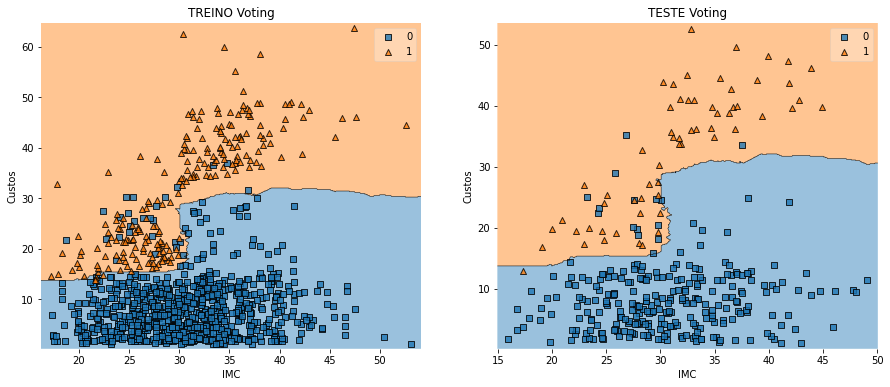

In [8]:
plot(clf, 'Voting', Xtrain, ytrain, Xtest, ytest)

In [9]:
clf = VotingClassifier(cross_models, voting='soft')
measure = cross_validate(clf, X, y, cv = validation, scoring = 'accuracy')
measure['test_score'].mean()

0.9648673923615009

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature nam

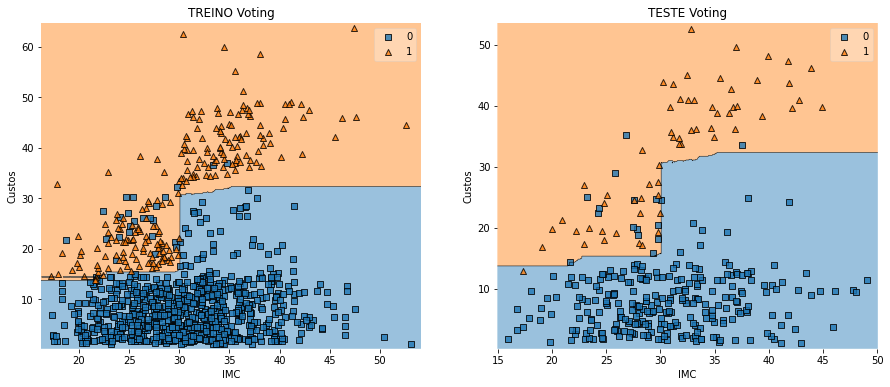

In [10]:
plot(clf, 'Voting', Xtrain, ytrain, Xtest, ytest)

### Bagging

In [3]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [12]:
model = BaggingClassifier(n_estimators = 150)
measure = cross_validate(model, X, y, cv = validation, scoring = 'accuracy')
measure['test_score'].mean()

0.9549190139527927

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


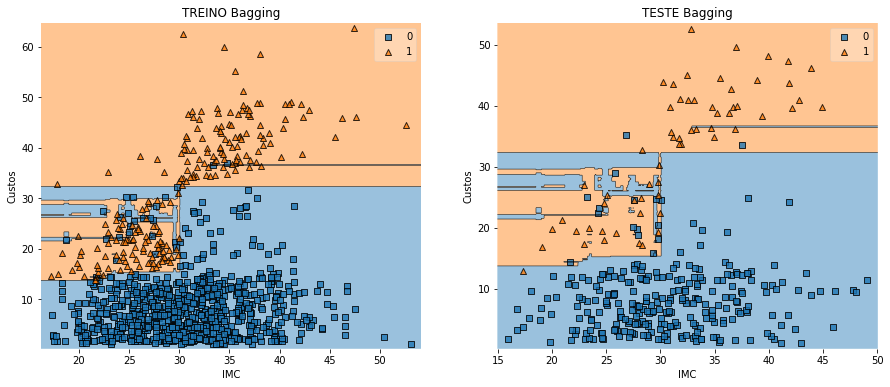

In [13]:
plot(model, 'Bagging', Xtrain, ytrain, Xtest, ytest)

### Random Forest

In [14]:
model = RandomForestClassifier(
  n_estimators = 200,
  max_features = 'auto',
  bootstrap = True,
  max_depth = 4,
  min_samples_split = 10,
)
measure = cross_validate(model, X, y, cv = validation, scoring = 'accuracy')
measure['test_score'].mean()

0.964360528186137

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


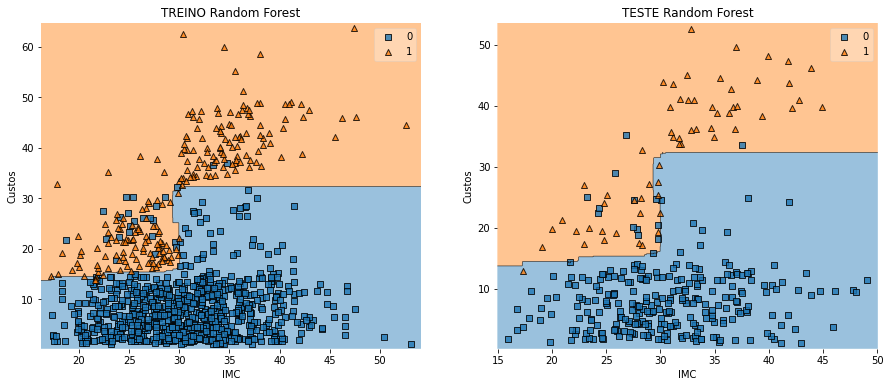

In [15]:
plot(model, 'Random Forest', Xtrain, ytrain, Xtest, ytest)

### Busca pela melhor acurácia nos parâmetros

In [22]:
def combinate_values(values):
    r_values = values.copy()

    if len(r_values) > 2:
        current = r_values.pop(0)
        combination = combinate_values(r_values)
        return combinateTwo(current, combination)

    return combinateTwo(*r_values)

def combinateTwo(arr1, arr2):
    combinations = []
    for item1 in arr1:
        for item2 in arr2:
            if type(item2) == tuple:
                item = (item1,) + item2
            else:
                item = (item1,) + (item2,)
            combinations.append(item)
    return combinations


In [36]:
ranges = [range(100, 500, 50), range(10, 110, 10), [2, 5, 10]]
combinations = combinate_values(ranges)
best, best_params = -1, {}
len(combinations)

96

In [37]:
for est, max, min in combinations:
  model = RandomForestClassifier(
    n_estimators = est,
    max_depth = max,
    min_samples_split = min,
    bootstrap = True,
    max_features = 'auto',
  )
  print(f'Testando: "n_estimators": {est}, "max_depth": {max}, "min_samples_split": {min}')
  measure = cross_validate(model, X, y, cv = validation, scoring = 'accuracy')
  mean = measure['test_score'].mean()

  if mean > best:
    best = mean
    best_params = {
      'n_estimators': est,
      'max_depth': max,
      'min_samples_split': min,
    }

print(f'Melhor média: {best} com os parâmetros {best_params}')

Testando: "n_estimators": 100, "max_depth": 3, "min_samples_split": 2
Testando: "n_estimators": 100, "max_depth": 3, "min_samples_split": 5
Testando: "n_estimators": 100, "max_depth": 3, "min_samples_split": 10
Testando: "n_estimators": 100, "max_depth": 5, "min_samples_split": 2
Testando: "n_estimators": 100, "max_depth": 5, "min_samples_split": 5
Testando: "n_estimators": 100, "max_depth": 5, "min_samples_split": 10
Testando: "n_estimators": 100, "max_depth": 7, "min_samples_split": 2
Testando: "n_estimators": 100, "max_depth": 7, "min_samples_split": 5
Testando: "n_estimators": 100, "max_depth": 7, "min_samples_split": 10
Testando: "n_estimators": 100, "max_depth": 9, "min_samples_split": 2
Testando: "n_estimators": 100, "max_depth": 9, "min_samples_split": 5
Testando: "n_estimators": 100, "max_depth": 9, "min_samples_split": 10
Testando: "n_estimators": 150, "max_depth": 3, "min_samples_split": 2
Testando: "n_estimators": 150, "max_depth": 3, "min_samples_split": 5
Testando: "n_est

#### Utilizando `RandomizedSearchCV`

In [1]:
def evaluate(model, test_features, test_labels):
  predictions = model.predict(test_features)
  errors = abs(predictions - test_labels)
  mape = 100 * np.mean(errors / test_labels)
  accuracy = 100 - mape
  print('Model Performance')
  print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
  print('Accuracy = {:0.2f}%.'.format(accuracy))
  return accuracy

In [12]:
import numpy as np

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 4, 8]
bootstrap = [True, False]

grid = {
  'n_estimators': n_estimators,
  'max_features': max_features,
  'max_depth': max_depth,
  'min_samples_split': min_samples_split,
  'min_samples_leaf': min_samples_leaf,
  'bootstrap': bootstrap,
}

rf_random = RandomizedSearchCV(
  estimator = RandomForestClassifier(), 
  param_distributions = grid,
  n_iter = 100,
  cv = 3,
  verbose = 2,
  random_state = 42,
  n_jobs = -1,
)

rf_random.fit(Xtrain, ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'bootstrap': False,
 'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 8,
 'min_samples_split': 10,
 'n_estimators': 100}

In [15]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 8,
 'min_samples_split': 10,
 'n_estimators': 100}

In [16]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=70, max_features='sqrt',
                       min_samples_leaf=8, min_samples_split=10)

In [17]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, Xtest, ytest)
random_accuracy

Model Performance
Average Error: 0.0358 degrees.
Accuracy = -inf%.


-inf

In [22]:
measure = cross_validate(rf_random.best_estimator_, X, y, cv = validation, scoring = 'accuracy')
random_accuracy = measure['test_score'].mean()
random_accuracy

0.9564021995286723

#### Utilizando GridSearchCV

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
  'bootstrap': [True],
  'max_depth': [10, 50, 80, 90, 100, 110],
  'max_features': [2, 3],
  'min_samples_leaf': [3, 4, 5],
  'min_samples_split': [8, 10, 12],
  'n_estimators': [100, 200, 300, 1000]
}

grid_search = GridSearchCV(
  estimator = RandomForestClassifier(), 
  param_grid = param_grid, 
  cv = 3,
  n_jobs = -1,
  verbose = 2,
)

In [30]:
grid_search.fit(Xtrain, ytrain)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
648 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
648 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 459, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [10, 50, 80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [31]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [32]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=50, max_features=2, min_samples_leaf=4,
                       min_samples_split=10)

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, Xtest, ytest)
grid_accuracy

In [33]:
best_grid = grid_search.best_estimator_
measure = cross_validate(best_grid, X, y, cv = validation, scoring = 'accuracy')
grid_accuracy = measure['test_score'].mean()
grid_accuracy

0.9583828975423635

##### Comparando os resultados

In [35]:
best = 0.9646205064901058
print('Comparado ao Base, Melhora de {:0.2f}%.'.format(100 * (random_accuracy - best) / best))
print('Comparado ao Base, Melhora de {:0.2f}%.'.format(100 * (grid_accuracy - best) / best))
print('Comparado ao RandomSearch, GridSearch melhora de {:0.2f}%.'.format(100 * (grid_accuracy - random_accuracy) / random_accuracy))

Comparado ao Base, Melhora de -0.85%.
Comparado ao Base, Melhora de -0.65%.
Comparado ao RandomSearch, GridSearch melhora de 0.21%.
